In [163]:
from sklearn import datasets
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

In [164]:
diabetes = datasets.load_diabetes()

In [165]:
df=pd.DataFrame(diabetes.data,columns=diabetes.feature_names)

In [166]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [167]:
df["Output"]=diabetes.target

In [168]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
Output    0
dtype: int64

In [169]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Output
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


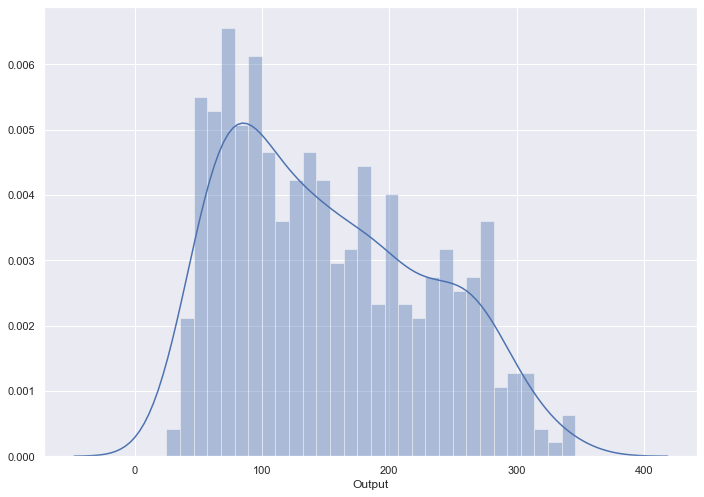

In [170]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['Output'], bins=30)
plt.show()

         age   sex   bmi    bp    s1    s2    s3    s4    s5    s6  Output
age     1.00  0.17  0.19  0.34  0.26  0.22 -0.08  0.20  0.27  0.30    0.19
sex     0.17  1.00  0.09  0.24  0.04  0.14 -0.38  0.33  0.15  0.21    0.04
bmi     0.19  0.09  1.00  0.40  0.25  0.26 -0.37  0.41  0.45  0.39    0.59
bp      0.34  0.24  0.40  1.00  0.24  0.19 -0.18  0.26  0.39  0.39    0.44
s1      0.26  0.04  0.25  0.24  1.00  0.90  0.05  0.54  0.52  0.33    0.21
s2      0.22  0.14  0.26  0.19  0.90  1.00 -0.20  0.66  0.32  0.29    0.17
s3     -0.08 -0.38 -0.37 -0.18  0.05 -0.20  1.00 -0.74 -0.40 -0.27   -0.39
s4      0.20  0.33  0.41  0.26  0.54  0.66 -0.74  1.00  0.62  0.42    0.43
s5      0.27  0.15  0.45  0.39  0.52  0.32 -0.40  0.62  1.00  0.46    0.57
s6      0.30  0.21  0.39  0.39  0.33  0.29 -0.27  0.42  0.46  1.00    0.38
Output  0.19  0.04  0.59  0.44  0.21  0.17 -0.39  0.43  0.57  0.38    1.00


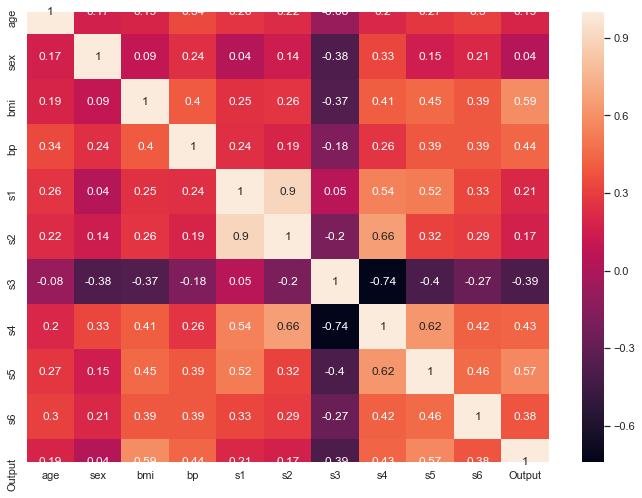

In [171]:

correlation_matrix = df.corr().round(2)
print(correlation_matrix)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

### An important point in selecting features for a linear regression model is to check for multi-co-linearity. here we observed that S1 and S2 are strongly correlated at 0.90 and s3 and s4 are also strongly correlated so we have removed these columns

In [172]:
#X = df.iloc[:,:-1]
X = pd.DataFrame(np.c_[df['bmi'], df['s5'], df['age'],df['sex'],df['s6'],df['bp']], columns = ['bmi','s5','age','sex','s6','bp'])
Y = df['Output']

In [173]:
X

,bmi,s5,age,sex,s6,bp
0,0.061696,0.019908,0.038076,0.050680,-0.017646,0.021872
1,-0.051474,-0.068330,-0.001882,-0.044642,-0.092204,-0.026328
2,0.044451,0.002864,0.085299,0.050680,-0.025930,-0.005671
3,-0.011595,0.022692,-0.089063,-0.044642,-0.009362,-0.036656
4,-0.036385,-0.031991,0.005383,-0.044642,-0.046641,0.021872
...,...,...,...,...,...,...
437,0.019662,0.031193,0.041708,0.050680,0.007207,0.059744
438,-0.015906,-0.018118,-0.005515,0.050680,0.044485,-0.067642
439,-0.015906,-0.046879,0.041708,0.050680,0.015491,0.017282
440,0.039062,0.044528,-0.045472,-0.044642,-0.025930,0.001215


In [174]:
X

,bmi,s5,age,sex,s6,bp
0,0.061696,0.019908,0.038076,0.050680,-0.017646,0.021872
1,-0.051474,-0.068330,-0.001882,-0.044642,-0.092204,-0.026328
2,0.044451,0.002864,0.085299,0.050680,-0.025930,-0.005671
3,-0.011595,0.022692,-0.089063,-0.044642,-0.009362,-0.036656
4,-0.036385,-0.031991,0.005383,-0.044642,-0.046641,0.021872
...,...,...,...,...,...,...
437,0.019662,0.031193,0.041708,0.050680,0.007207,0.059744
438,-0.015906,-0.018118,-0.005515,0.050680,0.044485,-0.067642
439,-0.015906,-0.046879,0.041708,0.050680,0.015491,0.017282
440,0.039062,0.044528,-0.045472,-0.044642,-0.025930,0.001215


In [175]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(353, 6)
(89, 6)
(353,)
(89,)


In [176]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [177]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('Mean squared error: %.2f'
      % mean_squared_error(Y_train, y_train_predict))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)

rmseTest = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2Test = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, y_test_predict))
print('RMSE is {}'.format(rmseTest))
print('R2 score is {}'.format(r2Test))
print("Difference between training and Testing set")
print("--------------------------------------")
print('Difference of RMSE between training and testing for Linear Regression is {}'.format(rmse-rmseTest))

The model performance for training set
--------------------------------------
RMSE is 54.97232633054144
Mean squared error: 3021.96
R2 score is 0.4811709389856541


The model performance for testing set
--------------------------------------
Mean squared error: 3117.65
RMSE is 55.83589317776487
R2 score is 0.5055784586523181
Difference between training and Testing set
--------------------------------------
Difference of RMSE between training and testing for Linear Regression is -0.8635668472234315


In [178]:
## Polynomial

In [145]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(353, 6)
(89, 6)
(353,)
(89,)


In [161]:
from sklearn.preprocessing import PolynomialFeatures
def create_polynomial_regression_model(degree):
      poly_features = PolynomialFeatures(degree=degree)
      X_train_poly = poly_features.fit_transform(X_train)
      poly_model = LinearRegression()
      poly_model.fit(X_train_poly, Y_train)
      y_train_predicted = poly_model.predict(X_train_poly)

      # predicting on test data-set
      y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

      # evaluating the model on training dataset
      rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
      r2_train = r2_score(Y_train, y_train_predicted)

      # evaluating the model on test dataset
      rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
      r2_test = r2_score(Y_test, y_test_predict)

      print("The model performance for the training set")
      print("-------------------------------------------")
      print("RMSE of training set is {}".format(rmse_train))
      print("R2 score of training set is {}".format(r2_train))

      print("\n")

      print("The model performance for the test set")
      print("-------------------------------------------")
      print("RMSE of test set is {}".format(rmse_test))
      print("R2 score of test set is {}".format(r2_test))
      print("Difference between training and Testing set")
      print("--------------------------------------")
      print('Difference of RMSE between training and testing for Poly Regression is {}'.format(rmse_train-rmse_test))


In [162]:
create_polynomial_regression_model(2)

The model performance for the training set
-------------------------------------------
RMSE of training set is 52.38387966809385
R2 score of training set is 0.5288801723075569


The model performance for the test set
-------------------------------------------
RMSE of test set is 53.91222353124168
R2 score of test set is 0.5390594275554141
Difference between training and Testing set
--------------------------------------
Difference of RMSE between training and testing for Poly Regression is -1.5283438631478319


In [179]:
##Author- AISC1003_ASHISH_SHARMA_500188494